In [71]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import unicodedata

# Descargar recursos de NLTK (si es la primera vez)
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("omw-1.4")

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Cargar los datos
data = pd.read_csv("reviews_prod_20_29.csv",sep=';', encoding="utf-8")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\alumno\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [72]:
def quitar_tildes(texto):
    return ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')

In [73]:
lemmatizer = WordNetLemmatizer()

def limpiar_texto(texto):
    # Quitar tildes
    texto = quitar_tildes(texto)
    # Convertir a minúsculas
    texto = texto.lower()
    # Eliminar signos de puntuación y caracteres especiales
    texto = re.sub(r"[^a-zA-Z\s]", " ", texto)
    # Tokenizar palabras
    palabras = word_tokenize(texto)
    # Lematizar
    palabras = [lemmatizer.lemmatize(palabra) for palabra in palabras] 
    # Eliminar stopwords
    palabras = [palabra for palabra in palabras if palabra not in stopwords.words("spanish")]
    return " ".join(palabras)

def sin_limpiar_texto(texto):
    return texto

# Aplicar limpieza a la columna de reseñas
data["review"] = data["review"].apply(sin_limpiar_texto)

In [74]:
#df.to_csv("reviews.csv", index=False, sep=';')
data

,review,stars
0,"Es un bote para rociar aceite, mi opinión es q...",1
1,"Lo siento , es fatal, no pulveriza nada bien. ...",1
2,No hace su función de spray. No lo aconsejo.,1
3,Funciona el primer día luego para tirarlo me d...,1
4,A los pocos usos se ha atascado el spray,1
...,...,...
113,Muy cómodo y práctico. Rápida entrega y en el ...,5
114,Muy buena y fácil de usar ! Practica para pode...,5
115,"Buen material, resistente y echa la cantidad p...",5
116,"Bastante potencia y no desperdicia aceite, bue...",5


In [78]:
# Cargar el dataset
# input_file = "reviews_prod_20_29.csv"
# data = pd.read_csv(input_file, sep=';', encoding="utf-8")

# Suponiendo que las reseñas están en la columna 'review'
reseñas = data['review'].astype(str).fillna("")

# Vectorización BoW
def bow(reseñas):
    vectorizer = CountVectorizer()
    return vectorizer.fit_transform(reseñas)


X = bow(reseñas)
y = data['stars']

# **ENTRENAMIENTO DEL MODELO**

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)

def entrenar_modelo(XTrain,XTest,YTrain,YTest):
    clasificadores = [
        MultinomialNB(),
        SVC(random_state = 12),
        LogisticRegression(random_state=12),
        DecisionTreeClassifier(criterion='entropy', random_state=12),  # Árbol de decisión base
        BaggingClassifier(estimator=DecisionTreeClassifier(criterion='entropy', random_state=12),
                         n_estimators=15, random_state=12),  # Bagging
        AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy', random_state=12),
                           n_estimators=15, random_state=12,algorithm = 'SAMME'),  # Boosting
        RandomForestClassifier(criterion='entropy', max_features='log2', n_estimators=15, random_state=12)  # Random Forest
    ]
    nombres = ['Naive-Bayes','SVC','LogisticRegression','DecisionTree', 'Bagging', 'Boosting', 'RandomForest']
    for i, clasificador in enumerate(clasificadores):
        #Entrenar modelo
        clasificador.fit(XTrain, YTrain)
        #Realizar prediccion
        y_test_pred = clasificador.predict(XTest)
        #Evaluar modelo
        acc = round(accuracy_score(YTest, y_test_pred)*100,2)
        print("El accuracy del clasificador ",nombres[i]," es: ",acc)
    
    return acc

acc = entrenar_modelo(X_train,X_test,Y_train,Y_test)

El accuracy del clasificador  Naive-Bayes  es:  62.5
El accuracy del clasificador  SVC  es:  58.33
El accuracy del clasificador  LogisticRegression  es:  62.5
El accuracy del clasificador  DecisionTree  es:  45.83
El accuracy del clasificador  Bagging  es:  54.17
El accuracy del clasificador  Boosting  es:  50.0
El accuracy del clasificador  RandomForest  es:  58.33


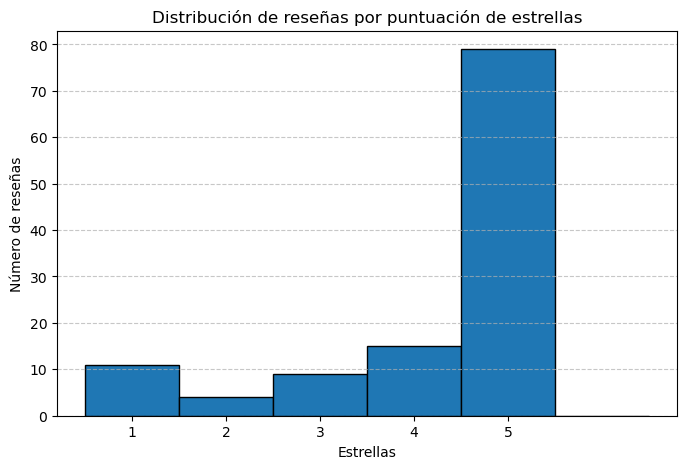

In [80]:
import matplotlib.pyplot as plt

# Crear histograma de la distribución de estrellas
plt.figure(figsize=(8, 5))
plt.hist(y, bins=range(1, 8), edgecolor='black', align='left')
plt.xticks(range(1, 6))  # Ajustar ticks a las puntuaciones de 1 a 5
plt.xlabel("Estrellas")
plt.ylabel("Número de reseñas")
plt.title("Distribución de reseñas por puntuación de estrellas")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
